# Problem Statement

Use Random Forest to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

# Step 1: Importing libraries

In [1]:
import numpy as np

#import lux
import sweetviz
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display

import warnings
warnings.filterwarnings('ignore')


# Step 2: Dataset loading & Data preprocessing

In [2]:
# reading csv file directly from github

file_path = 'https://raw.githubusercontent.com/ShrikantUppin/Ensemble_techniques/main/2_CSV%20files%20%26%20Problem%20Statements/Fraud_check.csv'

data = pd.read_csv(file_path, error_bad_lines=False)

In [3]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
data.columns = ['Undergrad', 'Marital_Status', 'Taxable_Income', 'City_Population',
       'Work_Experience', 'Urban']

In [5]:
data.isna().sum()

Undergrad          0
Marital_Status     0
Taxable_Income     0
City_Population    0
Work_Experience    0
Urban              0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital_Status   600 non-null    object
 2   Taxable_Income   600 non-null    int64 
 3   City_Population  600 non-null    int64 
 4   Work_Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [7]:
x = data.drop('Taxable_Income', axis = 1)

In [8]:
x.head()

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban
0,NO,Single,50047,10,YES
1,YES,Divorced,134075,18,YES
2,NO,Married,160205,30,YES
3,YES,Single,193264,15,YES
4,NO,Married,27533,28,NO


In [9]:
Y = pd.DataFrame(data = data, columns = ['Taxable_Income'])

In [10]:
for i in Y.Taxable_Income:
    if i>30000:
        Y['Taxable_Income'] = Y['Taxable_Income'].replace(i, 'Good')
    else:
        Y['Taxable_Income'] = Y['Taxable_Income'].replace(i, 'Rsiky')

In [11]:
# One hot encoding & label encoding..

x['Marital_Status'] = x.Marital_Status.astype('category')
x['Marital_Status'] = x['Marital_Status'].cat.codes

y  = pd.get_dummies(Y.copy(), drop_first=True)

In [12]:
x = pd.get_dummies(x, drop_first=True)

In [13]:
x.head()

,Marital_Status,City_Population,Work_Experience,Undergrad_YES,Urban_YES
0,2,50047,10,0,1
1,0,134075,18,1,1
2,1,160205,30,0,1
3,2,193264,15,1,1
4,1,27533,28,0,0


In [14]:
y.head()

,Taxable_Income_Rsiky
0,0
1,0
2,0
3,0
4,0


# Step 3: Splitting the dataset

In [15]:
def split_data(x,y):
    
    # setting required variables to the global so that they can be accessed outside of function
    global x_train, x_test, y_train, y_test
    
    from sklearn.model_selection import train_test_split

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33,\
                                                        random_state=42, stratify = y)

    #checking target variable data % equal in y_train & y_test
    print('checking tarfet label count balance in y_train & y_test')
    print('-'*40)
    print(y_test.value_counts(normalize=True))
    print('-'*40)
    print(y_train.value_counts(normalize=True))

In [16]:
split_data(x,y)

checking tarfet label count balance in y_train & y_test
----------------------------------------
Taxable_Income_Rsiky
0                       0.792929
1                       0.207071
dtype: float64
----------------------------------------
Taxable_Income_Rsiky
0                       0.793532
1                       0.206468
dtype: float64


# Step 4: Hyperparameter tuning

no. of tress in ranodm forest: 100


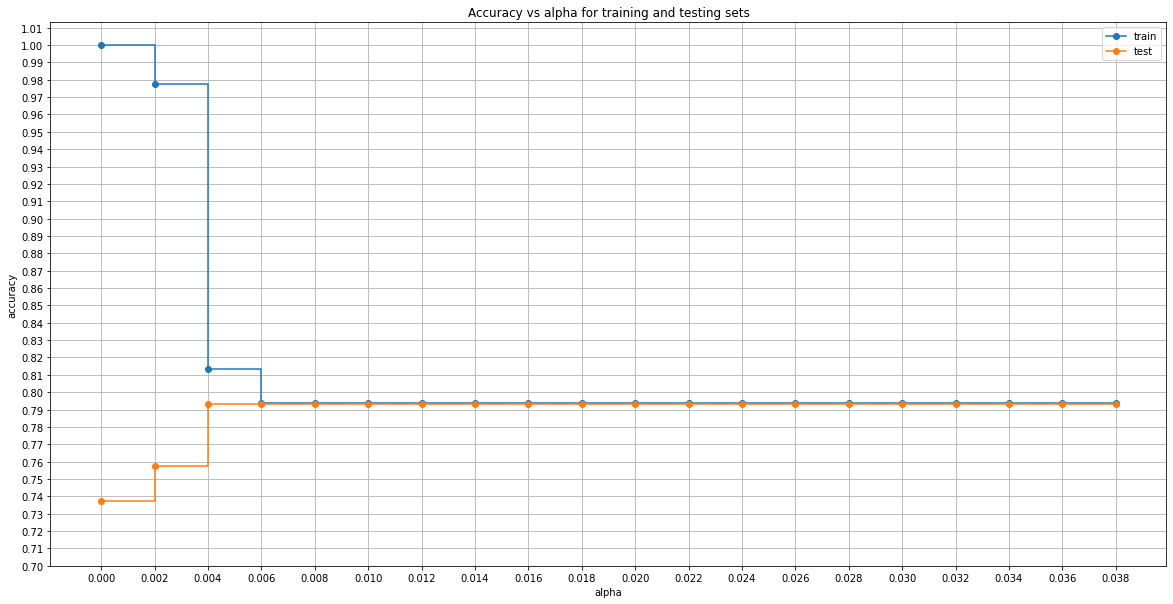

no. of tress in ranodm forest: 200


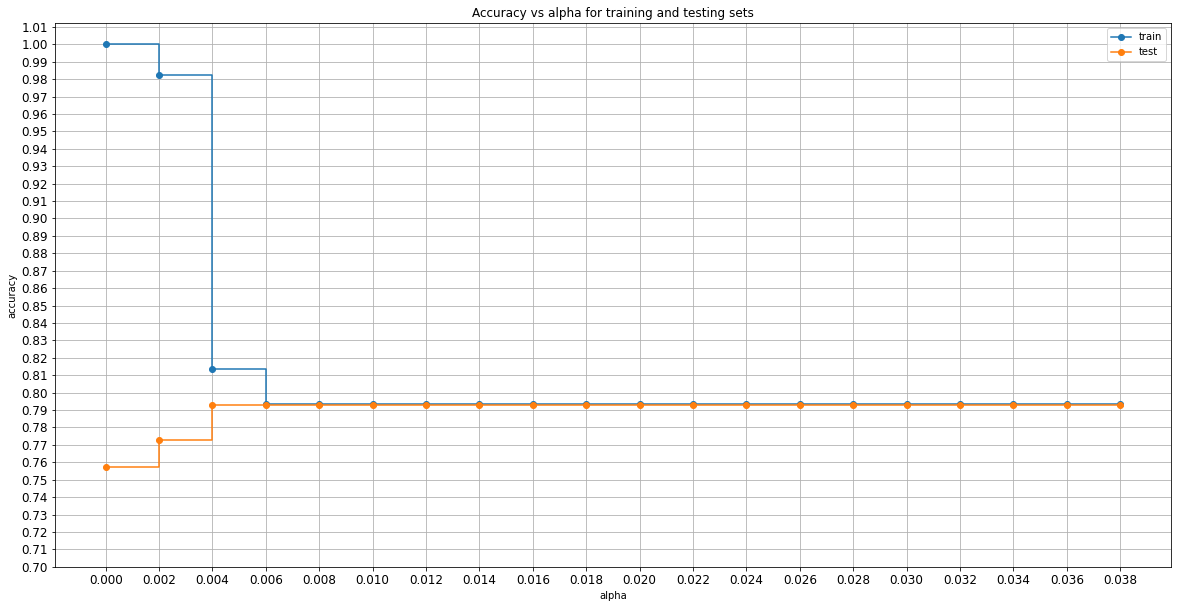

no. of tress in ranodm forest: 300


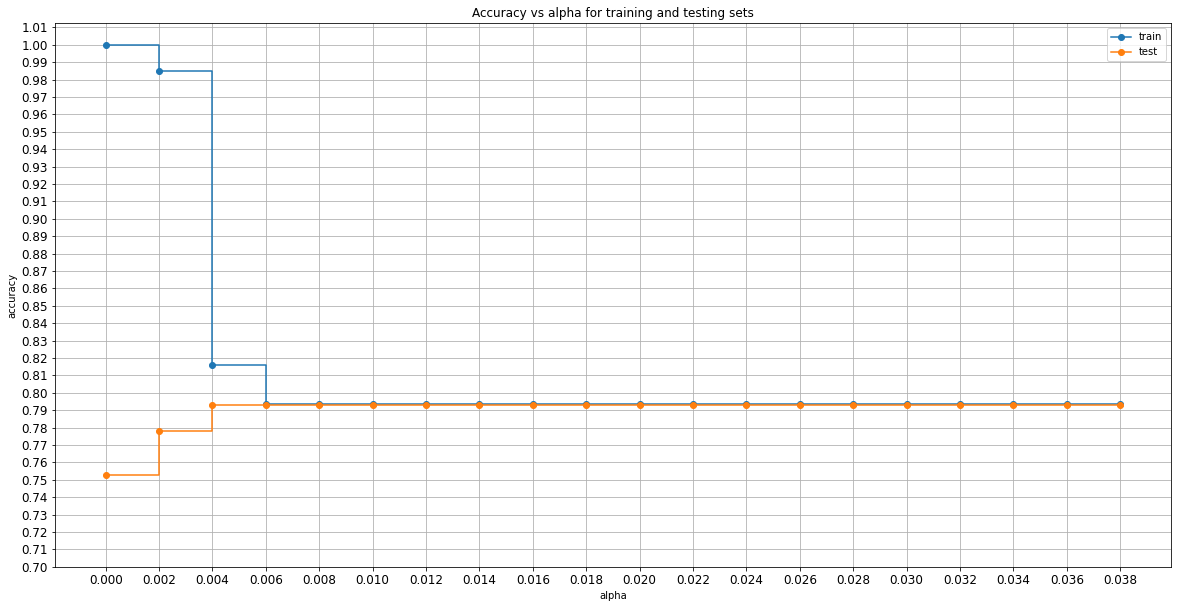

no. of tress in ranodm forest: 400


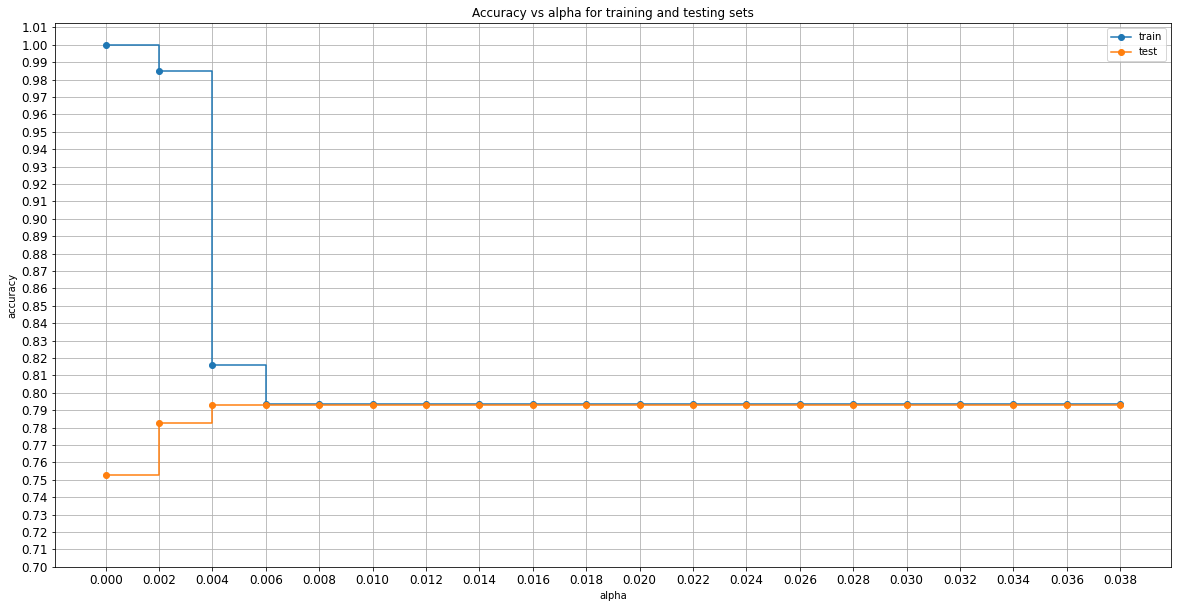

In [17]:
def find_alpha(x_train, x_test, y_train, y_test):
    
    import matplotlib.pyplot as plt
    from sklearn.ensemble import RandomForestClassifier
    
    for i in list(range(100,500,100)):
        print('no. of tress in ranodm forest:',i)
        ccp_alphas = np.arange(0.000, 0.040, 0.002)
        clfs = []
        for ccp_alpha in ccp_alphas:
            clf = RandomForestClassifier(n_estimators=i,random_state=42, ccp_alpha=ccp_alpha)
            clf.fit(x_train, y_train)
            clfs.append(clf)

        train_scores = [clf.score(x_train, y_train) for clf in clfs]
        test_scores = [clf.score(x_test, y_test) for clf in clfs]

        fig, ax = plt.subplots(figsize=(20,10))
        ax.set_xlabel("alpha")
        ax.set_ylabel("accuracy")
        ax.set_title("Accuracy vs alpha for training and testing sets")
        ax.plot(ccp_alphas, train_scores, marker='o', label="train",
                drawstyle="steps-post")
        ax.plot(ccp_alphas, test_scores, marker='o', label="test",
                drawstyle="steps-post")
        ax.set_xticks(np.arange(0.000,0.040, 0.002))
        ax.set_yticks(np.arange(0.70,1.01, 0.01))
        ax.legend()
        plt.grid(True)
        plt.rcParams['xtick.labelsize']=12
        plt.rcParams['ytick.labelsize']=12
        plt.show()

find_alpha(x_train, x_test, y_train, y_test)

ccp_alpha=0.006 gives best accuracy for train & test data.

# Step 5: Model Building...

In [18]:
def model_build(x_train, y_train, x_test, y_test, ccp_alpha_value=0.0, n_estimator=100):
    
    print()
    
    # importing required libraries
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import confusion_matrix, classification_report
    import seaborn as sns
    
    # creating classifier object/instance
    global model
    model = RandomForestClassifier(n_estimators=n_estimator, random_state=42, ccp_alpha = ccp_alpha_value)
    
    # fit model on train datasets
    model.fit(x_train, y_train)
    
    # train & test scores i.e. accuracy
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)
    
    # model prediction on x_train & x_test dataset
    y_pred_train = model.predict(x_train)
    y_pred_test  = model.predict(x_test)
    
    # confusion matrix
    train_cm = confusion_matrix(y_train, y_pred_train)
    test_cm = confusion_matrix(y_test, y_pred_test)
    
    # classification report
    train_classification = classification_report(y_train, y_train)
    test_classification = classification_report(y_test, y_test)
    
    # TRAIN DATA OUTPUTS..
    print('train_score:', train_score)
    print()
    
    print('CONFUSION MATRIX FOR TRAIN DATA')
    figure1, ax1 = plt.subplots(1,1)
    plt.figure(figsize=(10,8))
    sns.heatmap(train_cm, annot=True, ax = ax1, fmt = 'g')
    plt.show()
    print()
    
    print('Classification report for train data')
    print(train_classification)
    print('-'*100)
    
     # TEST DATA OUTPUTS..
    print('test_score:', test_score)
    print()
    print('CONFUSION MATRIX FOR TEST DATA')
    figure, ax2 = plt.subplots(1,1)
    plt.figure(figsize=(10,8))
    sns.heatmap(test_cm, annot=True, ax = ax2, fmt = 'g')
    plt.show()
    
    print('Classification report for test data')
    print(test_classification)
    print('-'*100)
    
    print('SUMMARY:','train score:',train_score,',', 'test score:', test_score)
    print('model_paramter:', model)
    
    print()
    print('-'*100)
    print("FEATURE IMPORTANCE FROM RANDOM FOREST MODEL")
    
    feature_names = x.columns

    feature_importances = model.feature_importances_
    sorted_idx = feature_importances.argsort()

    y_ticks = np.arange(0, len(feature_names))
    fig, ax = plt.subplots()
    ax.barh(y_ticks, feature_importances[sorted_idx])
    ax.set_yticklabels(feature_names[sorted_idx])
    ax.set_yticks(y_ticks)
    ax.set_title("Random Forest Feature Importances")
    fig.tight_layout()
    plt.show()


train_score: 0.7935323383084577

CONFUSION MATRIX FOR TRAIN DATA


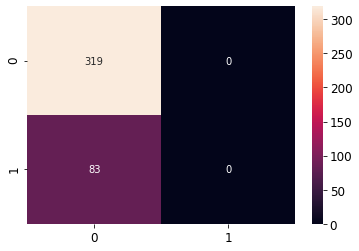

<Figure size 720x576 with 0 Axes>


Classification report for train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       319
           1       1.00      1.00      1.00        83

    accuracy                           1.00       402
   macro avg       1.00      1.00      1.00       402
weighted avg       1.00      1.00      1.00       402

----------------------------------------------------------------------------------------------------
test_score: 0.7929292929292929

CONFUSION MATRIX FOR TEST DATA


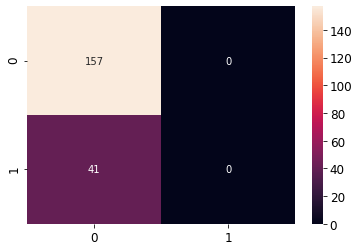

<Figure size 720x576 with 0 Axes>

Classification report for test data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00        41

    accuracy                           1.00       198
   macro avg       1.00      1.00      1.00       198
weighted avg       1.00      1.00      1.00       198

----------------------------------------------------------------------------------------------------
SUMMARY: train score: 0.7935323383084577 , test score: 0.7929292929292929
model_paramter: RandomForestClassifier(ccp_alpha=0.006, n_estimators=200, random_state=42)

----------------------------------------------------------------------------------------------------
FEATURE IMPORTANCE FROM RANDOM FOREST MODEL


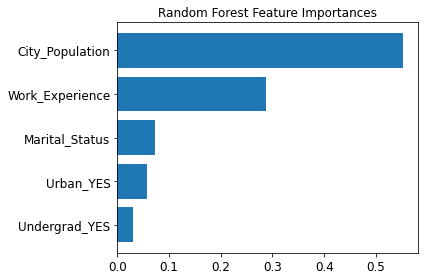

In [19]:
model_build(x_train, y_train, x_test, y_test, ccp_alpha_value=0.006, n_estimator=200)

# Step 6: Model cross validation.

In [20]:
def model_cross_validation(x, y, cv=5):

    from sklearn import metrics
    from sklearn.model_selection import cross_val_score

    scores = cross_val_score(model, x, y, cv=5)

    print(scores)
    print()
    print('The mean score and the 95% confidence interval of the score estimate:')
    print()
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)) 

In [21]:
model_cross_validation(x, y)

[0.8        0.79166667 0.79166667 0.79166667 0.79166667]

The mean score and the 95% confidence interval of the score estimate:

Accuracy: 0.79 (+/- 0.01)


# Step 7: Visualizing the Random forest

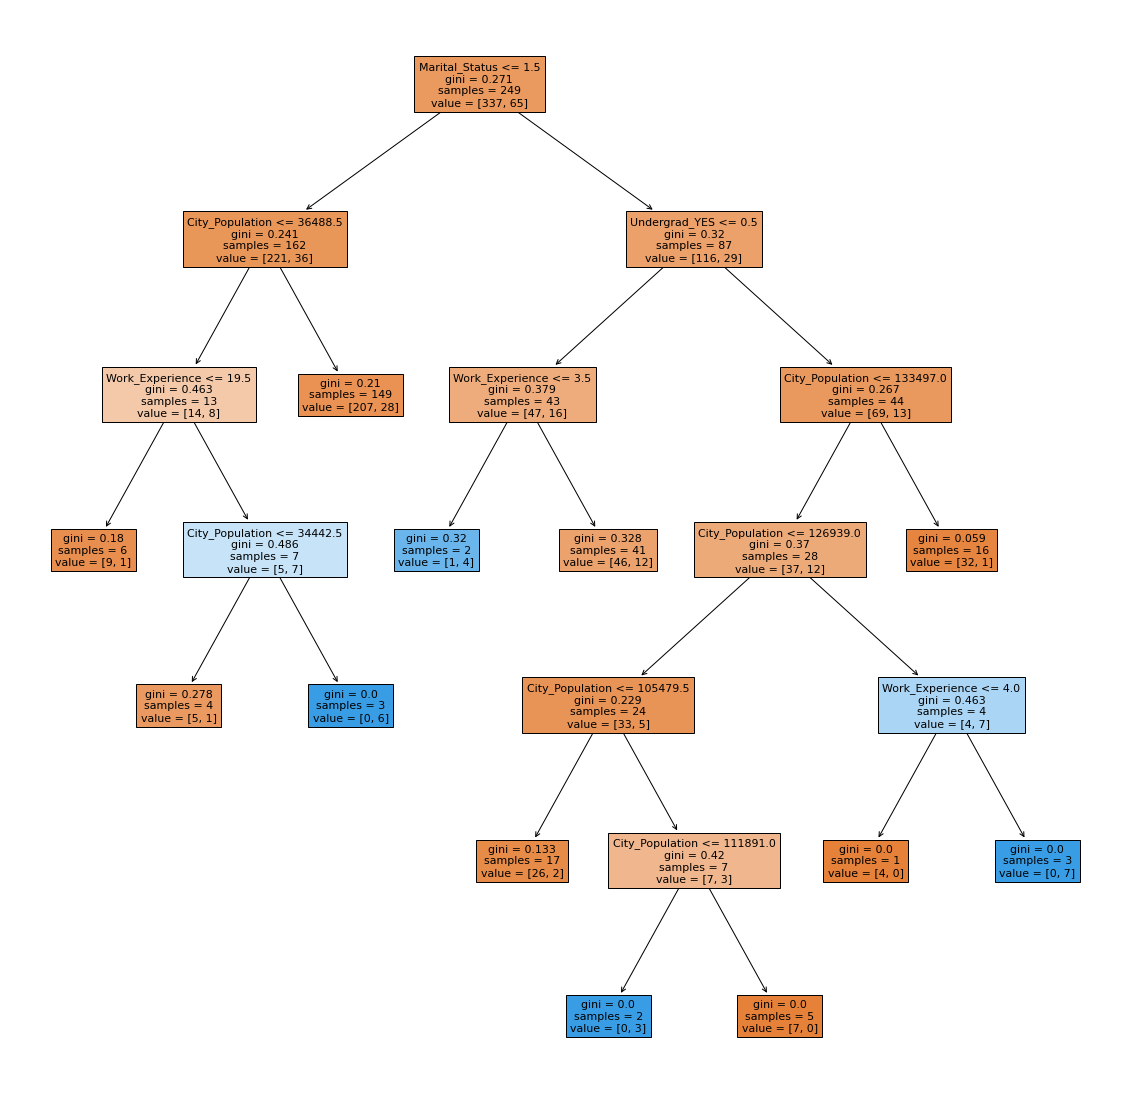

In [22]:
# We can plot a first Decision Tree from the Random Forest (with index 0 in the list):

from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(model.estimators_[0], feature_names = x.columns, filled=True)
plt.show()